# Assignment CIE 5703 - week 6

#### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

## Charlotte rain gauge dataset 15 min data from 1994 - 2015

#### Read in data

In [2]:
charlotte_rainfall = pd.read_csv('./Raw_RG_Data/Charlotte_CRN_gage_1994.csv', header = None)
for i in range(1995,2015):
    cur_rainfall = pd.read_csv('./Raw_RG_Data/Charlotte_CRN_gage_%d.csv' % i, header = None)
    charlotte_rainfall = charlotte_rainfall.append(cur_rainfall, ignore_index=True)

#### Format data to year, month, day, hour, min and rainfall

In [3]:
charlotte_rainfall = charlotte_rainfall.iloc[:,:6]
charlotte_rainfall.columns = ["year","month","day", "hour", "min", "Rainfall"]
charlotte_rainfall.loc[:,'dt'] = pd.to_datetime(dict(year=charlotte_rainfall['year'], month=charlotte_rainfall['month'], day=charlotte_rainfall['day'], hour=charlotte_rainfall['hour'], minute=charlotte_rainfall['min']))
charlotte_rainfall.index=charlotte_rainfall['dt']

#### Plot rain data as read

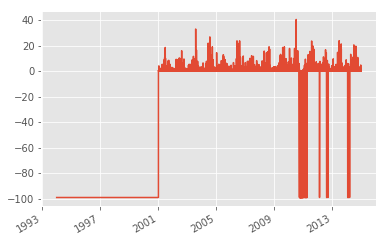

In [4]:
plt.plot(charlotte_rainfall['dt'], charlotte_rainfall["Rainfall"])
plt.gcf().autofmt_xdate()

#### Replace invalid data with NaNs and plot again

In [5]:
charlotte_rainfall["Rainfall"] = charlotte_rainfall["Rainfall"].replace(-99, np.nan)

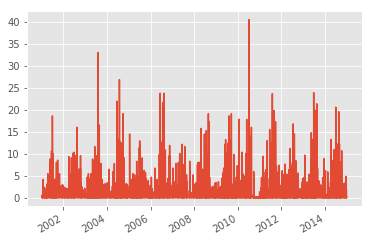

In [6]:
plt.plot(charlotte_rainfall['dt'], charlotte_rainfall["Rainfall"])
plt.gcf().autofmt_xdate()

In [7]:
charlotte_rainfall.head()

,year,month,day,hour,min,Rainfall,dt
dt,,,,,,,
1994-01-01 00:00:00,1994,1,1,0,0,NaN,1994-01-01 00:00:00
1994-01-01 00:15:00,1994,1,1,0,15,NaN,1994-01-01 00:15:00
1994-01-01 00:30:00,1994,1,1,0,30,NaN,1994-01-01 00:30:00
1994-01-01 00:45:00,1994,1,1,0,45,NaN,1994-01-01 00:45:00
1994-01-01 01:00:00,1994,1,1,1,0,NaN,1994-01-01 01:00:00


#### Resample the 10-min dataset to 24h accumulated rainfall data

In [8]:
charlotte_24h_rainfall = pd.DataFrame()
charlotte_24h_rainfall['mean_rain'] = charlotte_rainfall.Rainfall.resample('D').mean()
charlotte_24h_rainfall['accum_rain'] = charlotte_rainfall.Rainfall.resample('D').sum()

In [9]:
charlotte_24h_rainfall.tail()

,mean_rain,accum_rain
dt,,
2014-12-27,0.000000,0.000
2014-12-28,0.007938,0.762
2014-12-29,0.187854,18.034
2014-12-30,0.015875,1.524
2014-12-31,0.000000,0.000


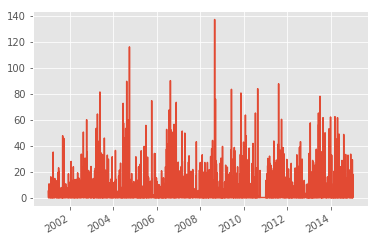

In [10]:
plt.plot(charlotte_24h_rainfall["accum_rain"])
plt.gcf().autofmt_xdate()

#### Resample 15 min data to 1h accumulated dataset

In [11]:
charlotte_1h_rainfall = pd.DataFrame()
charlotte_1h_rainfall['mean_rain'] = charlotte_rainfall.Rainfall.resample('H').mean()
charlotte_1h_rainfall['accum_rain'] = charlotte_rainfall.Rainfall.resample('H').sum()

In [12]:
charlotte_1h_rainfall.head()

,mean_rain,accum_rain
dt,,
1994-01-01 00:00:00,NaN,NaN
1994-01-01 01:00:00,NaN,NaN
1994-01-01 02:00:00,NaN,NaN
1994-01-01 03:00:00,NaN,NaN
1994-01-01 04:00:00,NaN,NaN


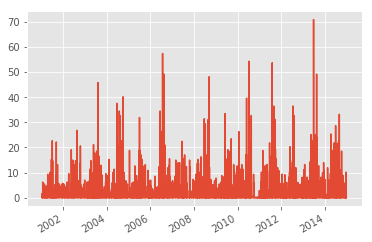

In [13]:
plt.plot(charlotte_1h_rainfall["accum_rain"])
plt.gcf().autofmt_xdate()

#### Select only summer months (April - Sept)

In [14]:
charlotte_summer_1h_rainfall = charlotte_1h_rainfall.loc[(charlotte_1h_rainfall.index.month>=4) & (charlotte_1h_rainfall.index.month<=9)]

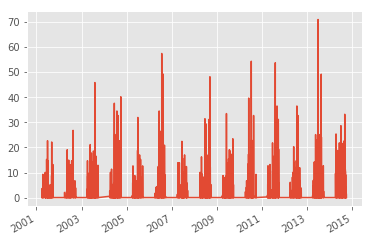

In [15]:
plt.plot(charlotte_summer_1h_rainfall["accum_rain"])
plt.gcf().autofmt_xdate()

#### Select only winter months (Oct - Mar)

In [16]:
mask_start = (charlotte_1h_rainfall.index.month >= 1) & (charlotte_1h_rainfall.index.month <= 3)
mask_end = (charlotte_1h_rainfall.index.month >= 10) & (charlotte_1h_rainfall.index.month <= 12)
mask = mask_start | mask_end

In [17]:
charlotte_winter_1h_rainfall = charlotte_1h_rainfall.loc[mask]

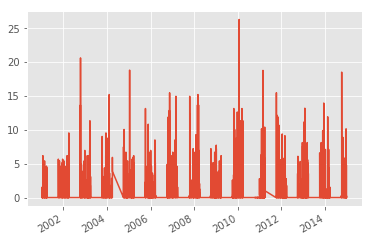

In [18]:
plt.plot(charlotte_winter_1h_rainfall["accum_rain"])
plt.gcf().autofmt_xdate()

In [19]:
charlotte_winter_1h_rainfall.head()

,mean_rain,accum_rain
dt,,
1994-01-01 00:00:00,NaN,NaN
1994-01-01 01:00:00,NaN,NaN
1994-01-01 02:00:00,NaN,NaN
1994-01-01 03:00:00,NaN,NaN
1994-01-01 04:00:00,NaN,NaN


#### Resample 15 min dataset to monthly accumulated dataset

In [20]:
charlotte_monthly_rainfall = pd.DataFrame()
charlotte_monthly_rainfall['mean_rain'] = charlotte_rainfall.Rainfall.resample('M').mean()
charlotte_monthly_rainfall['accum_rain'] = charlotte_rainfall.Rainfall.resample('M').sum()

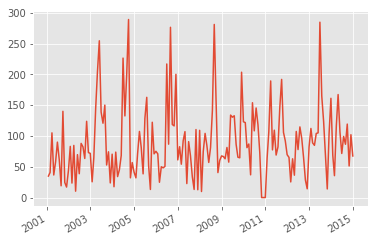

In [21]:
plt.plot(charlotte_monthly_rainfall["accum_rain"])
plt.gcf().autofmt_xdate()

## Answering the assignments

### 1. General statistics for 24-hour and 15-min datasets: compute mean, standard deviation, skewness; plot histograms

#### 15 min dataset

Mean, standard deviation and skewness of the 15 min dataset

In [22]:
print('Mean: %s' % str(charlotte_rainfall.Rainfall.mean()))
print('Std: %s' % str(charlotte_rainfall.Rainfall.std()))
print('Skew: %s' % str(charlotte_rainfall.Rainfall.skew()))

Mean: 0.0308591125909
Std: 0.354761056652
Skew: 31.8036079401


Histogram of the data

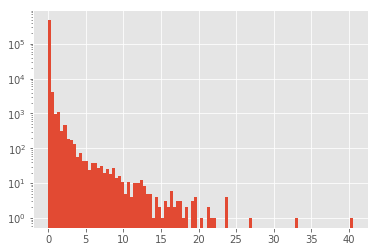

In [23]:
charlotte_rainfall.Rainfall.hist(bins = 100)
plt.gca().set_yscale("log")

Histogram of the data without zeros

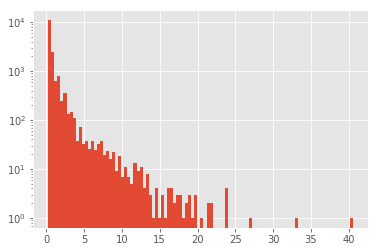

In [24]:
cur_data = charlotte_rainfall.Rainfall.loc[charlotte_rainfall.Rainfall>0]
hist_d = plt.hist(cur_data, bins=100)
plt.gca().set_yscale("log")

#### 24h accumulated dataset

Mean, standard deviation and skewness of 24h accumulated dataset

In [25]:
print('Mean: %s' % str(charlotte_24h_rainfall.accum_rain.mean()))
print('Std: %s' % str(charlotte_24h_rainfall.accum_rain.std()))
print('Skew: %s' % str(charlotte_24h_rainfall.accum_rain.skew()))

Mean: 2.95431623325
Std: 9.00781350848
Skew: 5.36032791051


Histogram of the dataset

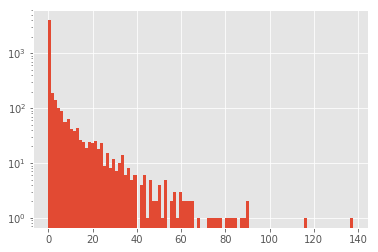

In [26]:
charlotte_24h_rainfall.accum_rain.hist(bins = 100)
plt.gca().set_yscale("log")

Histogram without zeros

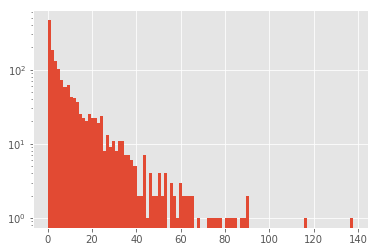

In [27]:
cur_data = charlotte_24h_rainfall.accum_rain.loc[charlotte_24h_rainfall.accum_rain>0]
hist_d = plt.hist(cur_data, bins=100)
plt.gca().set_yscale("log")

### 2. a. Analysis of seasonal cycles: create boxplots for monthly totals across all years

Merge monthly dataset across all years

In [28]:
monthly_rain = pd.DataFrame()
for i in range(0,12,1):
    cur_data = charlotte_monthly_rainfall.iloc[i::12,:]
    cur_data.index = range(0, len(cur_data))
    cur_rain = cur_data.accum_rain
    rain_per_month = pd.DataFrame(cur_rain)
    monthly_rain['%d' % i] = rain_per_month

In [29]:
monthly_rain.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
16,121.82348,81.08442,87.02294,36.93414,154.09926,108.39704,145.5674,118.20144,73.0758,0.000,0.000,0.000
17,64.77000,106.93400,189.48400,77.47000,109.47400,69.08800,82.2960,147.32000,192.0240,105.918,92.202,69.596
18,65.27800,25.40000,62.99200,36.32200,107.44200,77.97800,114.8080,96.01200,65.2780,28.448,14.224,82.296
19,112.26800,88.90000,84.83600,104.14000,105.15600,284.98800,165.1000,123.69800,70.8660,13.970,103.378,161.290
20,68.83400,35.56000,116.07800,167.38600,106.42600,71.62800,99.3140,86.61400,119.3800,51.308,102.108,67.564


Boxplot of monthly totals

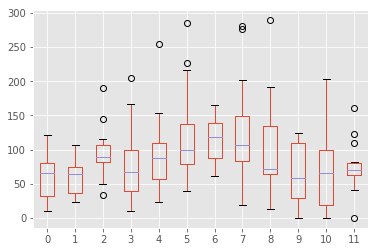

In [30]:
monthly_rain.plot.box()

### 2. b. Analysis of diurnal cycles: create boxplots for hourly totals for entire dataseries

Merge hourly data across all years

In [31]:
hourly_rain = pd.DataFrame()
for i in range(0,24,1):
    cur_data = charlotte_1h_rainfall.iloc[i::24, :]
    cur_data.index = range(0, len(cur_data))
    cur_rain = cur_data.accum_rain
    rain_per_day = pd.DataFrame(cur_rain)
    hourly_rain['%d' % i] = rain_per_day

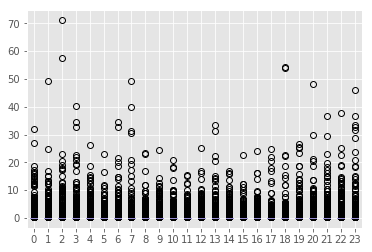

In [32]:
hourly_rain.plot.box()

### 2. c. Variation of diurnal cycles with seasons: create boxplots for hourly totals for summer season (April – September) and for winter season (October-March)

Merge summer hourly data

In [33]:
hourly_rain_summer = pd.DataFrame()
for i in range(0,24,1):
    cur_data = charlotte_summer_1h_rainfall.iloc[i::24, :]
    cur_data.index = range(0, len(cur_data))
    cur_rain = cur_data.accum_rain
    rain_per_day = pd.DataFrame(cur_rain)
    #rain_per_day = rain_per_day.replace(0, np.nan)
    hourly_rain_summer['%d' % i] = rain_per_day

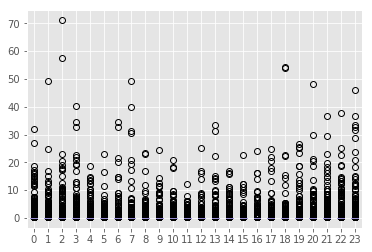

In [34]:
hourly_rain_summer.plot.box()

Merge hourly winter data

In [35]:
hourly_rain_winter = pd.DataFrame()
for i in range(0,24,1):
    cur_data = charlotte_winter_1h_rainfall.iloc[i::24, :]
    cur_data.index = range(0, len(cur_data))
    cur_rain = cur_data.accum_rain
    rain_per_day = pd.DataFrame(cur_rain)
    #rain_per_day = rain_per_day.replace(0, np.nan)
    hourly_rain_winter['%d' % i] = rain_per_day

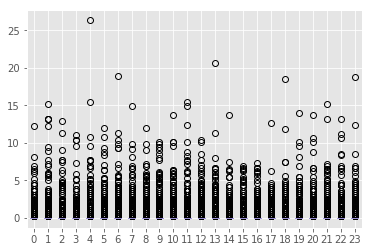

In [36]:
hourly_rain_winter.plot.box()

### 2. d. Diurnal cycles of intense storm events: Count nr of exceedances above 10 mm/h threshold for each hour of the day, for entire data series and for summer months only

Show rainfall events > 10mm /h over entire 1h accumulated dataset

In [37]:
print(charlotte_1h_rainfall.accum_rain[charlotte_1h_rainfall.accum_rain>10])

dt
2001-05-22 20:00:00    10.06348
2001-06-13 23:00:00    12.12850
2001-06-14 00:00:00    15.22476
2001-06-28 22:00:00    22.71014
2001-07-04 23:00:00    10.32256
2001-07-05 00:00:00    14.70914
2001-09-04 13:00:00    22.19198
2001-09-24 13:00:00    13.16228
2001-09-24 15:00:00    12.13104
2002-05-13 22:00:00    19.09572
2002-06-06 23:00:00    14.96822
2002-06-25 22:00:00    10.58164
2002-07-03 22:00:00    13.15974
2002-07-14 14:00:00    11.09726
2002-07-24 23:00:00    14.71168
2002-08-16 02:00:00    10.84072
2002-08-17 00:00:00    26.83764
2002-08-17 03:00:00    12.12850
2002-10-11 10:00:00    13.67536
2002-10-11 11:00:00    12.38758
2002-10-13 12:00:00    10.06602
2002-10-13 13:00:00    20.64258
2003-03-20 06:00:00    11.35380
2003-04-07 06:00:00    14.71168
2003-05-21 20:00:00    21.16074
2003-05-27 04:00:00    14.70914
2003-06-09 02:00:00    17.80794
2003-06-16 22:00:00    14.19352
2003-07-11 21:00:00    16.25854
2003-07-13 04:00:00    18.58010
                         ...   
2013-

Amount of hourly events

In [38]:
print(len(charlotte_1h_rainfall.accum_rain[charlotte_1h_rainfall.accum_rain>10]))

254


10 mm/h events in summer periods

In [39]:
print(charlotte_summer_1h_rainfall.accum_rain[charlotte_summer_1h_rainfall.accum_rain>10])

dt
2001-05-22 20:00:00    10.06348
2001-06-13 23:00:00    12.12850
2001-06-14 00:00:00    15.22476
2001-06-28 22:00:00    22.71014
2001-07-04 23:00:00    10.32256
2001-07-05 00:00:00    14.70914
2001-09-04 13:00:00    22.19198
2001-09-24 13:00:00    13.16228
2001-09-24 15:00:00    12.13104
2002-05-13 22:00:00    19.09572
2002-06-06 23:00:00    14.96822
2002-06-25 22:00:00    10.58164
2002-07-03 22:00:00    13.15974
2002-07-14 14:00:00    11.09726
2002-07-24 23:00:00    14.71168
2002-08-16 02:00:00    10.84072
2002-08-17 00:00:00    26.83764
2002-08-17 03:00:00    12.12850
2003-04-07 06:00:00    14.71168
2003-05-21 20:00:00    21.16074
2003-05-27 04:00:00    14.70914
2003-06-09 02:00:00    17.80794
2003-06-16 22:00:00    14.19352
2003-07-11 21:00:00    16.25854
2003-07-13 04:00:00    18.58010
2003-07-29 19:00:00    11.35634
2003-08-04 23:00:00    45.93590
2003-08-05 03:00:00    19.09572
2003-08-24 05:00:00    16.51508
2003-09-23 03:00:00    12.90320
                         ...   
2013-

Amount of hourly events

In [40]:
print(len(charlotte_summer_1h_rainfall.accum_rain[charlotte_summer_1h_rainfall.accum_rain>10]))

205
